In [1]:
#Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Installed essential package Pyforest that will automatically import essential libraries
!pip install pyforest
from pyforest import *

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kaggle_movie_train.csv')

<IPython.core.display.Javascript object>

In [4]:
#Exploring the dataset
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
df.shape

(22579, 3)

In [6]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [7]:
df["genre"].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [8]:
genre_count=df.groupby("genre").count()
genre_count

,id,text
genre,,
action,2392,2392
adventure,147,147
comedy,2941,2941
drama,8873,8873
horror,456,456
other,270,270
romance,63,63
sci-fi,613,613
thriller,6824,6824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

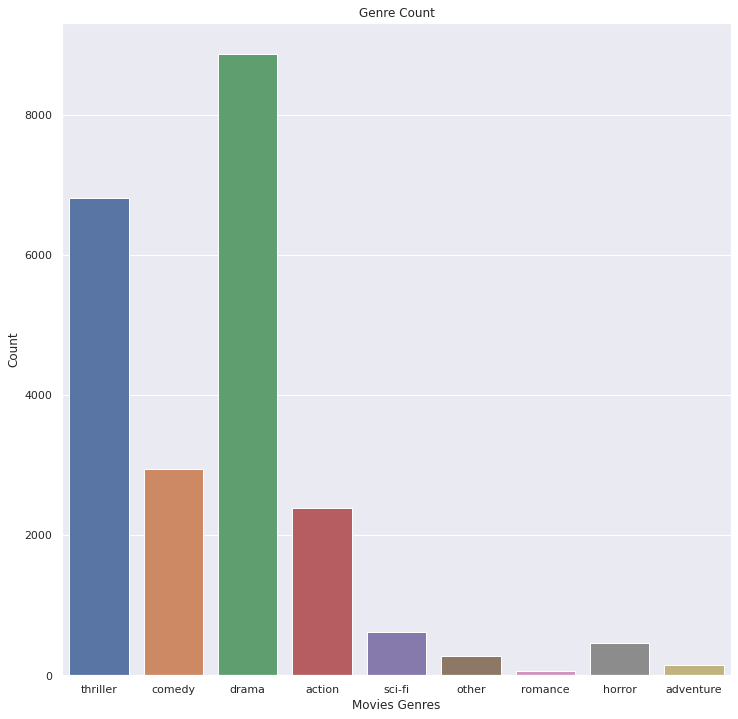

In [10]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.set(style="darkgrid")
sns.countplot(x="genre",data=df)
plt.xlabel("Movies Genres")
plt.ylabel("Count")
plt.title("Genre Count")
plt.show()

In [11]:
active_imports()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


['import seaborn as sns',
 'import matplotlib.pyplot as plt',
 'import pandas as pd']

In [12]:
#Data cleaning and Preprocessing
#1>Finding unique genres
movies_genre=list(df["genre"].unique())
movies_genre.sort()
movies_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [13]:
#Mapping genres into values
genre_mapper={"other":0,"action":1,"adventure":2,"comedy":3,"drama":4,"horror":5,"romance":6,"sci-fi":7,"thriller":8}
df["genre"]=df["genre"].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [14]:
#Finding NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [15]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [16]:
df.shape

(22579, 2)

In [ ]:
# Importing essential libraries for performing Natural Language Processing on given dataset
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [19]:
active_imports()

import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import pandas as pd


['import seaborn as sns',
 'import nltk',
 'import matplotlib.pyplot as plt',
 'import pandas as pd']

In [20]:
df.shape

(22579, 2)

In [ ]:
#Cleaning Text 
corpus=[]
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
nltk.download('wordnet')

for i in range(0, df.shape[0]):
  # Removing special character from the text/dialog
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire text/dialog into lower case
  dialog = dialog.lower()

  # Tokenizing the text/dialog by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words Using PorterStemmer as well as WordNet Lemmatizer
 # words = [ps.stem(word) for word in dialog_words]
  words= [wordnet.lemmatize(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)


In [22]:
corpus[0:10]

['eady dead maybe even wishing int nd floor hallway three night orderly lead liza door orderly white guy open door step room three white guy mid look wild straight jacketed jerry liza reached end rope shake head int decrepit hospital room night balled fetal really head pressed cement try sing jerry blue moon blue moon int nd floor hallway three night liza stand leaning rail wall orderly sure going know bad orderly okay liza start hall orderly following orderly got new patient last week want see liza wave hopeless stop chicken wired window end hall look light break jerry somewhere orderly look gotta get back work',
 'summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy 

In [23]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [24]:
drama_words_list=[]
for i in list(df[df['genre']==4].index):
  drama_words_list.append(corpus[i]) 
drama=""
for i in range(0,4):
  drama+=drama_words_list[i] 
print(drama)  


come surprise take hand lead hallway salvatore look feel pang seems smaller age withers body slightly stooped hair gathered knot back head must tired want rest time funeral salvatore interrupting mamma take hour air know maria smiling ironically tell year salvatore get message feel guilty thinking seems incredible never come maria open door step aside let son whisper put thing go go salvatore lake step flabbergasted sight old room perfectly reconstructed preserved look like museum museum past despite bed clothes cupboard book shelf perfectly clear one ever livednd dismount child reach throw arm embracing charlotte hurry behind martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin house partially rebuilt habitable workshop already completed martin child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant martin walk workshop trailed susan carry completed rocking chair cha

In [25]:
from PIL import Image
movie_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/Datasets/movie.png"))
movie_mask

<IPython.core.display.Javascript object>

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [26]:
movie_mask.shape

(890, 980, 4)

In [27]:
len(movie_mask)

890

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

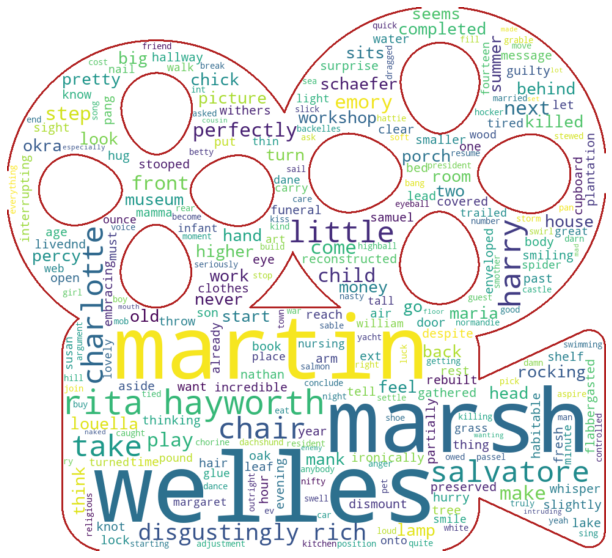

In [28]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=movie_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(drama)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
thriller_words_list=[]
for i in list(df[df['genre']==8].index):
  thriller_words_list.append(corpus[i])
thriller=" "
for i in range(0,4):
  thriller+=thriller_words_list[i]
print(thriller)

 eady dead maybe even wishing int nd floor hallway three night orderly lead liza door orderly white guy open door step room three white guy mid look wild straight jacketed jerry liza reached end rope shake head int decrepit hospital room night balled fetal really head pressed cement try sing jerry blue moon blue moon int nd floor hallway three night liza stand leaning rail wall orderly sure going know bad orderly okay liza start hall orderly following orderly got new patient last week want see liza wave hopeless stop chicken wired window end hall look light break jerry somewhere orderly look gotta get back workded two detective int jeff apartment night medium shot thorwald fight dislodge jeff grip ext jeff apartment night close shot looking jeff face showing strain pain thorwald attack brick floor patio seems hundred foot int jeff apartment night medium shot thorwald jeff struggling ext neighborhood night semi close shot doyle pulling top wall lisa stella two men looking lisa white fac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

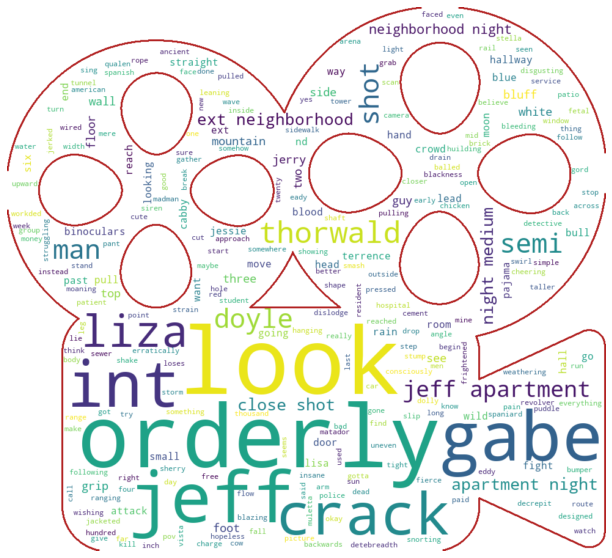

In [30]:
wc1 = WordCloud(background_color="white", max_words=1000, mask=movie_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc1.generate(thriller)

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
comedy_words_list=[]
for i in list(df[df['genre']==3].index):
  comedy_words_list.append(corpus[i])
comedy=" "
for i in range(0,4):
  comedy+=comedy_words_list[i]
print(comedy)

 summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy ending hugging jimmy hold start rise nelson house cloud xenia ted v guess everybody pretty much lived happily ever parent give grocery store descend cloud quickly find ext london buckingham palace day mom dad take picture smooch front palace ted v manage sneak away second honeymoonsay man go far people say gone far say keep good man course still lot learn big noise made st valentine day good public relation letting two witness get away sure careless table joe jerry try make small possible spat worry two guy good dead almost caught today bonaparte turning hearing aid mean let get away twice click tongue people would 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

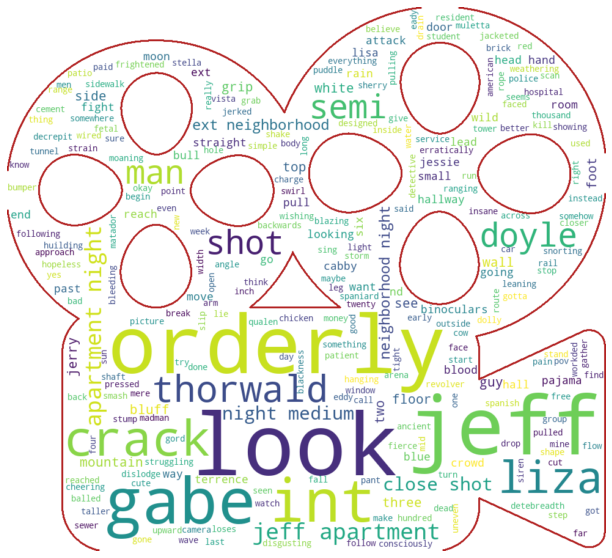

In [32]:
wc2 = WordCloud(background_color="white", max_words=1000, mask=movie_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc2.generate(thriller)

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
active_imports()

import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import nltk
import numpy as np


['import matplotlib.pyplot as plt',
 'import pandas as pd',
 'import re',
 'import seaborn as sns',
 'import nltk',
 'import numpy as np']

In [34]:
#Feature generation using BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000,ngram_range=(1,1))
X=cv.fit_transform(corpus).toarray()
y=df["genre"].values

In [35]:
#Model Building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print("X_train:{},X_test:{}".format(X_train.shape,X_test.shape))

X_train:(18063, 10000),X_test:(4516, 10000)


In [36]:
#Fitting Naive_Bayes to training set
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=0.1)
nb.fit(X_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [37]:
# Predicting the Test set results
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.90      0.95      0.93       476
           2       1.00      0.89      0.94        45
           3       0.89      0.93      0.91       559
           4       0.94      0.91      0.93      1827
           5       0.84      0.85      0.85        82
           6       0.73      1.00      0.85        11
           7       0.91      0.87      0.89       132
           8       0.91      0.92      0.91      1318

    accuracy                           0.92      4516
   macro avg       0.90      0.92      0.91      4516
weighted avg       0.92      0.92      0.92      4516



In [38]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Accuracy score is {}%".format(round(score*100,2)))

Accuracy score is 91.78%


In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[  64,    0,    0,    0,    0,    1,    0,    0,    1],
       [   0,  453,    0,    8,    5,    0,    0,    0,   10],
       [   0,    1,   40,    0,    3,    0,    0,    0,    1],
       [   0,    6,    0,  520,   18,    1,    0,    2,   12],
       [   2,   28,    0,   29, 1661,    7,    3,    4,   93],
       [   0,    3,    0,    3,    4,   70,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,   11,    0,    0],
       [   0,    3,    0,    1,    6,    0,    0,  115,    7],
       [   0,    8,    0,   21,   67,    4,    1,    6, 1211]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Confusion Matrix for Multinomial Naive Bayes')

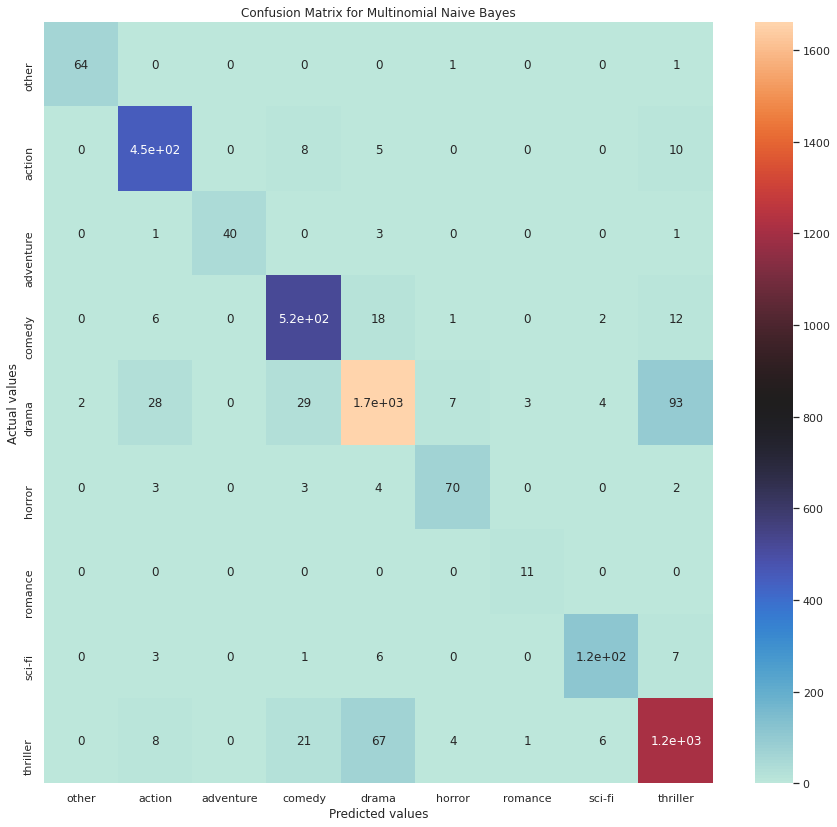

In [41]:
# Plotting the confusion matrix
plt.figure(figsize=(15,14))
axis_labels=['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=cm,annot=True,xticklabels=axis_labels,yticklabels=axis_labels,linecolor="White",cmap="icefire")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for Multinomial Naive Bayes")

In [42]:
#Hyperparameter tuning Naive Bayes Classifier
best_score=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_nb=MultinomialNB(alpha=i)
  temp_nb.fit(X_train,y_train)
  temp_nb_y_pred=temp_nb.predict(X_test)
  temp_score=accuracy_score(y_test,temp_nb_y_pred)
  print("Accuracy score for alpha={} is {}%:".format(round(i,1),round(temp_score*100,2)))
  if temp_score>best_score:
    best_score=temp_score
    alpha_val=i
  print("The best accuracy is {}% with alpha ={}".format(round(best_score*100,2),round(alpha_val,1)))

<IPython.core.display.Javascript object>

Accuracy score for alpha=0.1 is 91.78%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.2 is 91.34%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.3 is 91.16%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.4 is 91.12%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.5 is 90.92%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.6 is 90.57%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.7 is 90.46%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.8 is 90.28%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.9 is 90.15%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=1.0 is 90.1%:
The best accuracy is 91.78% with alpha =0.1


In [43]:
# Loading test dataset
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kaggle_movie_test.csv')
test.columns

<IPython.core.display.Javascript object>

Index(['id', 'text'], dtype='object')

In [44]:
test.shape

(5589, 2)

In [45]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [46]:
  def genre_prediction(sample_script):
        sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
        sample_script = sample_script.lower()
        sample_script_words = sample_script.split()
        sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
        wordnet=WordNetLemmatizer()
        final_script = [wordnet.lemmatize(word) for word in sample_script_words]
        final_script = ' '.join(final_script)
        temp = cv.transform([final_script]).toarray()
        return nb.predict(temp)[0]

In [47]:
# For generating random integer
from random import randint

In [48]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: MAN across from his is staring at his. Malcolm looks away. The Curious Man still stares. Nervy, the Curious Man gets up and approaches. MALCOLM under his breath Shit. The Curious Man sits down next to Malcolm, grinning. MAN You're him, aren't you? MALCOLM Excuse me? MAN The guy. The scientist. I saw you on TV. conspiratorially I believed you. No response from Malcolm. The guy leans in even closer. MAN cont'd Roooooarr. MALCOLM a withering look I was misquoted. I was merely speculating on the evolutionary scenario of a Lost World. I never said I was in any such place. He gets up and moves to another seat on the car, away from the Curious Man. As he sits down, he notices two other COMMUTERS across from him are staring at him. He looks at them. They looks away. He pulls the collar of his coat up tight around him. Nowhere to hide. INT. JOHN HAMMOND'S APARTMENT NIGHT A UNIFORMED BUTLER has a question BUTLER Whom shall I tell Mr. Hammond is calling? MALCOLM stands in the foyer of an 

<IPython.core.display.Javascript object>

Prediction: drama


In [50]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: h you. PENGUIN I oughta have you spayed! You sent out all the signals! CATWOMAN moment of doubt Did I? Only 'cause my mom trained me to, with a man... any man, all men slaps her forehead Corn dog! Enough self hate. Catwoman redirects her rage at Penguin. CATWOMAN Me, domesticated? By you? I doubt it! You repulsive... awful... penguin . PENGUIN The name is Oswald Cobblepot. He hooks the umbrella's handle around her neck. It auto matically curls into a tight semi noose, then the ribs start to spin, shredding the pannels... it's now a tiny helicopter... PENGUIN And the wedding's been called off . Catwoman is yanked up, into the air. Penguin wistfully waves fairwell. Then mopes away. EXT. GOTHAM SKYLINE NIGHT Catwoman whirls through the Gotham sky. She painfully stretches out with her claws and tears open the strangling handle. She is released. Catwoman makes a dazzlingly awesome freefall plunge, finally crashing through a skylight into... INT. A PENTHOUSE GREENHOUSE NIGHT and a ta

<IPython.core.display.Javascript object>

Prediction: thriller
